# Principal Component Analysis with Clustering - Wine Dataset

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ds = pd.read_csv("wine.csv")

In [3]:
ds.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


#### we should drop Type column for our analysis

In [4]:
data = ds.drop("Type",axis=1)

In [5]:
data.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


#### Standarizing dataset

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

In [8]:
scaled_X = scaler.fit_transform(data)

In [9]:
scaled_X.shape

(178, 13)

#### Creating Principal Components using scikit learn

In [10]:
from sklearn.decomposition import PCA

In [11]:
pca = PCA(n_components=3)

In [12]:
principal_components = pca.fit_transform(scaled_X)

Text(0, 0.5, 'Second Principal Component')

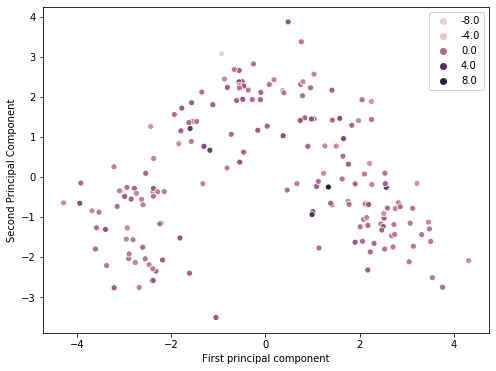

In [14]:
plt.figure(figsize=(8,6))
sns.scatterplot(principal_components[:,0],principal_components[:,1],hue=principal_components[:,2])
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [15]:
df_comp = pd.DataFrame(pca.components_,index=['PC1','PC2','PC3'],columns=data.columns)

#### lets plot heatmap to check principal components weights for each features

(3.0, 0.0)

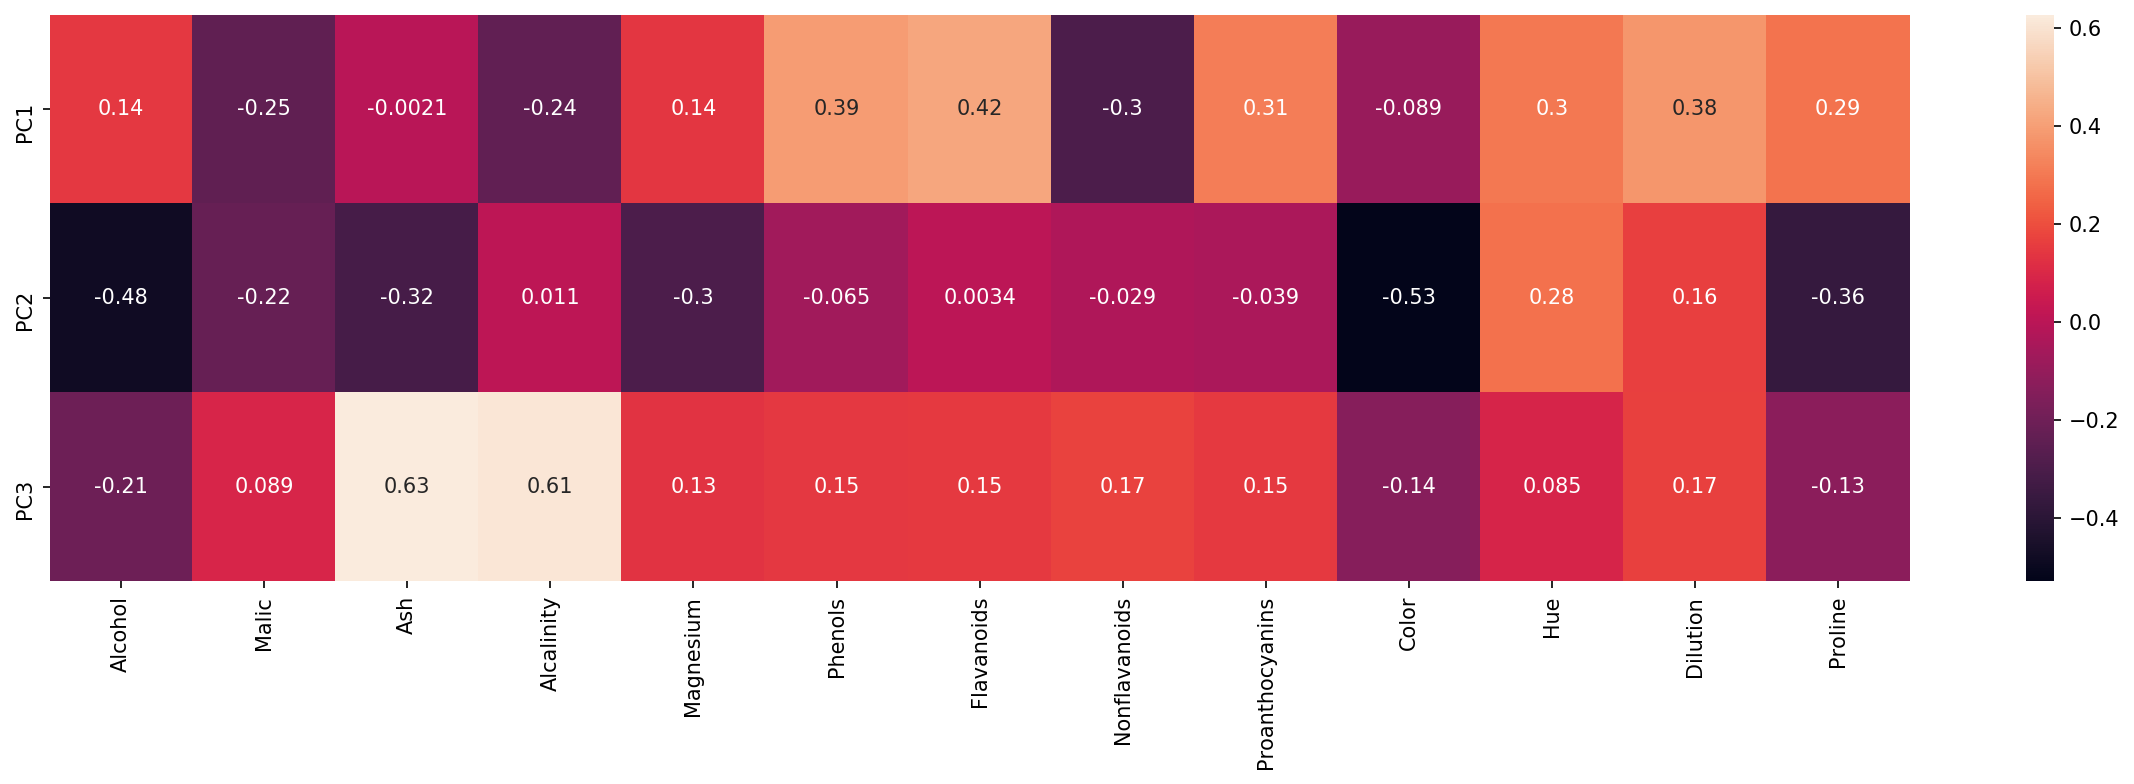

In [17]:
plt.figure(figsize=(20,5),dpi=150)
ax = sns.heatmap(df_comp,annot=True) 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [18]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631])

In [19]:
np.sum(pca.explained_variance_ratio_)

0.6652996889318524

#### The above value tells us that our 3 principal components can explain 66.5% of dataset

Lets check the when our components equals to no of features of dataset

In [20]:
pca_13 = PCA(n_components=13)
pca_13.fit(scaled_X)

PCA(n_components=13)

In [21]:
pca_13.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [22]:
np.sum(pca_13.explained_variance_ratio_)

1.0

#### We see that when no of components = no of features it explains the 100% of dataset

In [23]:
explained_variance = []

for n in range(1,14):
    pca = PCA(n_components=n)
    pca.fit(scaled_X)
    
    explained_variance.append(np.sum(pca.explained_variance_ratio_))

Text(0, 0.5, 'Variance Explained')

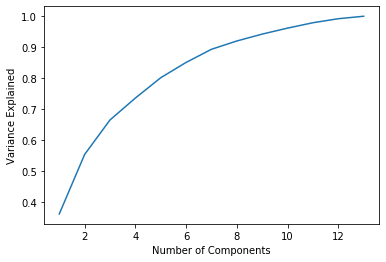

In [24]:
plt.plot(range(1,14),explained_variance)
plt.xlabel("Number of Components")
plt.ylabel("Variance Explained")

#### The above graph explains variances of dataset w.r.t no of components

### As problem statement states lets stick to 3 components and perform clustering techinques.

In [25]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage

In [26]:
df_pca = pd.DataFrame(principal_components,columns=['PC1','PC2','PC3'])

In [27]:
df_pca.head()

,PC1,PC2,PC3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688


In [28]:
# creating complete linkage with euclidean distance
z = linkage(df_pca,method='complete',metric='euclidean')

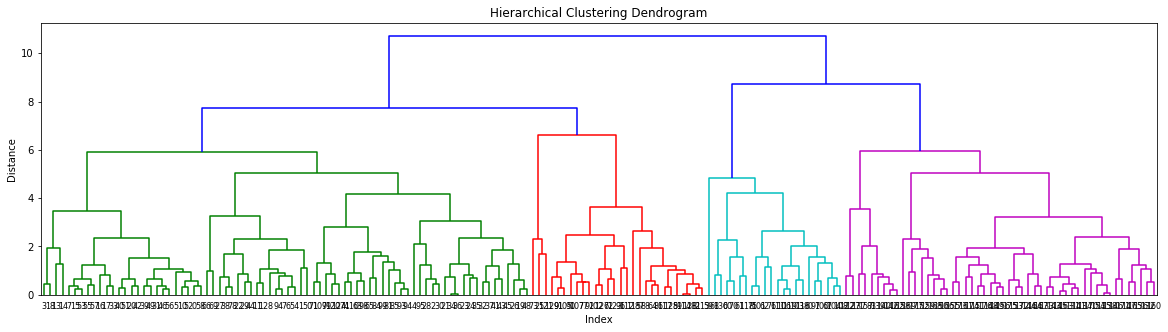

In [29]:
#ploting dendrogram for above linkage
plt.figure(figsize=(20, 5));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(
    z,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

#### The above dendogram tells us there can be 4 clusters in the dataset

In [30]:
# creating centroid linkage with euclidean distance
z1 = linkage(df_pca,method='average',metric='euclidean')

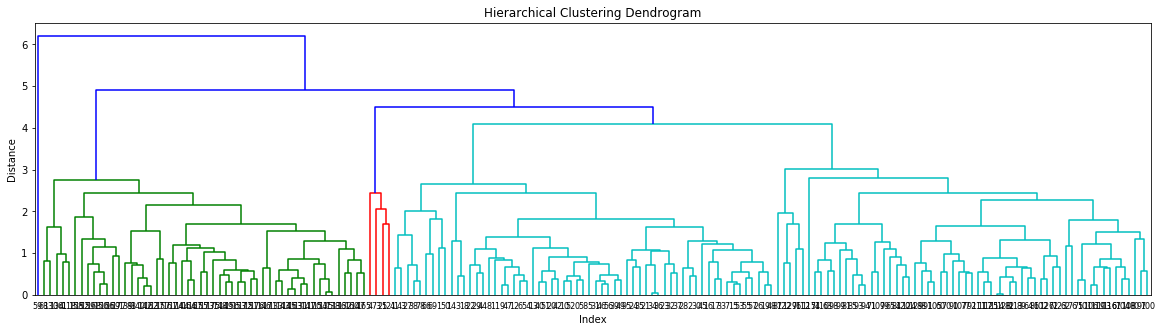

In [31]:
#ploting dendrogram for above linkage
plt.figure(figsize=(20, 5));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(
    z1,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

#### Average linkage dendogram shows mainly 2 clusters and a small 3rd clusters

### Lets try K-means clustering to check how many clusters our dataset contains

In [32]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [33]:
###### screw plot or elbow curve ############
k = list(range(2,15))
TWSS = [] # variable for storing total within sum of squares for each kmeans 

In [34]:
for i in k :
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_pca)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(cdist(df_pca.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_pca.shape[1]),'euclidean')))
        
    TWSS.append(sum(WSS))

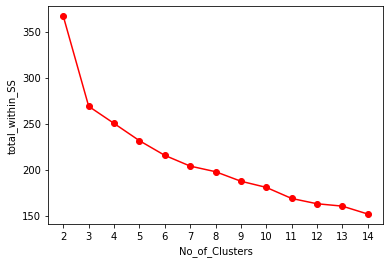

In [35]:
# Scree plot 
plt.plot(k,TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k);

#### Above Scree plot tells us a sharp elbow is formed at 3 no of clusters. So lets choose k=3 and perform K-means

In [36]:
# Selecting 3 clusters from the above scree plot which is the optimum number of clusters 
model=KMeans(n_clusters=3) 
model.fit(df_pca)

KMeans(n_clusters=3)

In [37]:
model.labels_ # getting the labels of clusters assigned to each row 
md=pd.Series(model.labels_)  # converting numpy array into pandas series object
data_k = data
data_k['cluster']=md # creating a  new column and assigning it to new column 

In [38]:
data_k =data_k.iloc[:,[13,0,1,2,3,4,5,6,7,8,9,10,11,12]]

In [39]:
data_k.head()

,cluster,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


#### The above dataframe now contains cluster no wrt to features 

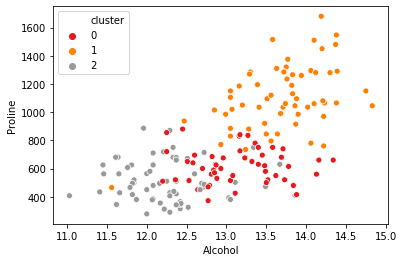

In [54]:
sns.scatterplot(data=data_k,x='Alcohol',y='Proline',hue='cluster',palette='Set1')

#### The plots is against the K-means and PCA results dataset, which clearly identifies 3 types of clusters. Now lets match this with original dataset and see the difference

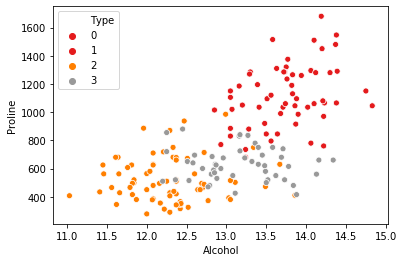

In [61]:
sns.scatterplot(data=ds,x='Alcohol',y='Proline',hue='Type',palette='Set1')

#### We see that plots and cluster are very similar to each other and has only 3 clusters in original dataset. 

In [62]:
# To check no of clusters in original dataset as we saw 4 types in above plot.
ds['Type'].unique()

array([1, 2, 3], dtype=int64)

In [63]:
## We dont have any type 0 cluster in orignal dataset